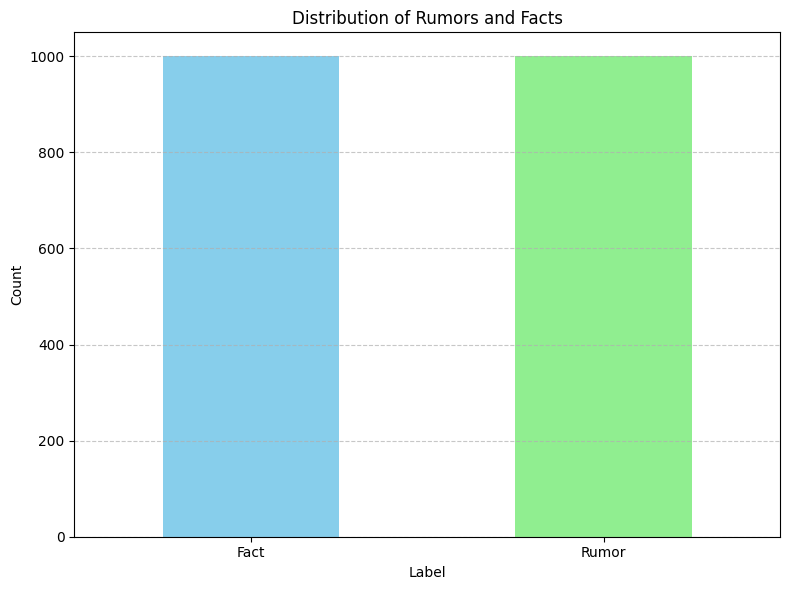

              precision    recall  f1-score   support

        Fact       1.00      1.00      1.00       201
       Rumor       1.00      1.00      1.00       199

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Prediction: Fact
Logistic Regression Classification Report:
              precision    recall  f1-score   support

        Fact       1.00      1.00      1.00       201
       Rumor       1.00      1.00      1.00       199

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Prediction using loaded Logistic Regression model: Fact


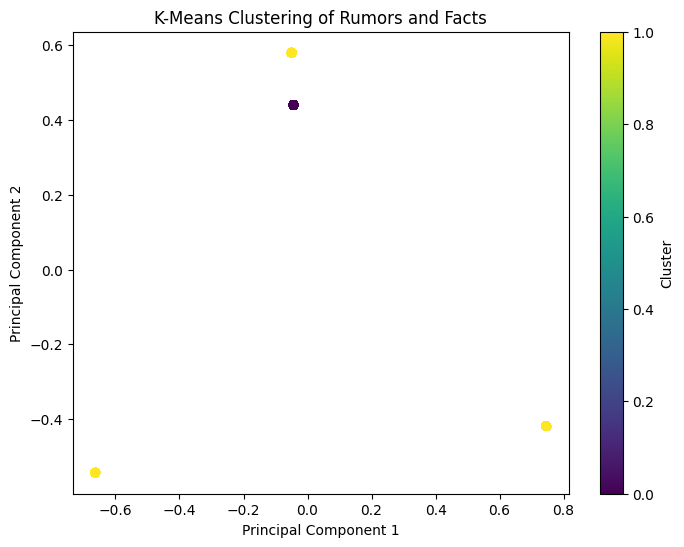

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import joblib

# Model Name
model_name = "Rumor Mill: Tracking Viral Rumors through Textual Analysis"

# Function to generate synthetic rumors
def generate_rumors(num_samples):
    rumors = [
        "Aliens spotted in New York City!",
        "Eating carrots cures cancer, scientists say.",
        # Add more rumors as needed
    ]
    return np.random.choice(rumors, num_samples)

# Function to generate synthetic facts
def generate_facts(num_samples):
    facts = [
        "The sky is blue.",
        "Water boils at 100 degrees Celsius.",
        # Add more facts as needed
    ]
    return np.random.choice(facts, num_samples)

# Generate synthetic data
num_samples = 1000
rumors = generate_rumors(num_samples)
facts = generate_facts(num_samples)
data = np.concatenate([rumors, facts])
labels = np.array(['Rumor'] * num_samples + ['Fact'] * num_samples)

# Create DataFrame
df = pd.DataFrame({'Text': data, 'Label': labels})

# Save dataset to CSV
df.to_csv('synthetic_rumors_dataset.csv', index=False)

# Visualize the distribution of rumors and facts
plt.figure(figsize=(8, 6))
df['Label'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribution of Rumors and Facts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Fact', 'Rumor'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Preprocess the text data and vectorize it using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X = vectorizer.fit_transform(df['Text'])
y = df['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Example of using the model for prediction
new_sentence = input("Enter a sentence to classify as rumor or fact: ")
new_sentence_vectorized = vectorizer.transform([new_sentence])
prediction = clf.predict(new_sentence_vectorized)
print("Prediction:", prediction[0])

# Save the model as a .pkl file
joblib.dump(clf, 'rumor_mill_classifier.pkl')

# Load the model from the .pkl file
loaded_model = joblib.load('rumor_mill_classifier.pkl')



from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression classifier
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Evaluate the Logistic Regression model
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Save the Logistic Regression model
joblib.dump(logreg, 'rumor_mill_logistic_regression.pkl')

# Load the Logistic Regression model
loaded_logreg = joblib.load('rumor_mill_logistic_regression.pkl')

# Test the loaded Logistic Regression model
new_sentence_logreg = input("Enter a sentence to classify using the loaded Logistic Regression model: ")
new_sentence_vectorized_logreg = vectorizer.transform([new_sentence_logreg])
prediction_logreg = loaded_logreg.predict(new_sentence_vectorized_logreg)
print("Prediction using loaded Logistic Regression model:", prediction_logreg[0])


from sklearn.cluster import KMeans

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2)  # Assuming we want to cluster into two groups: rumors and facts
kmeans.fit(X)

# Predict clusters for the data
cluster_labels = kmeans.predict(X)

# Visualize the clusters (2D PCA for visualization)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering of Rumors and Facts')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
